# Kallisto Quantification Analysis

In [109]:
import pandas as pd
import os
from tqdm.notebook import tqdm

### Get abundances

In [3]:
#Get files with abundance
er_samples = os.listdir('../ER/kallisto/output/')
tnbc_samples = os.listdir('../TNBC/kallisto/output/')
df = pd.DataFrame()
for sample in er_samples:
    df1 = pd.read_csv('../ER/kallisto/output/'+sample+'/abundance.tsv',sep='\t')
    df1['sample'] = sample
    df = pd.concat([df,df1],ignore_index=True)
for sample in tnbc_samples:
    df1 = pd.read_csv('../TNBC/kallisto/output/'+sample+'/abundance.tsv',sep='\t')
    df1['sample'] = sample
    df = pd.concat([df,df1],ignore_index=True)
df

,target_id,length,eff_length,est_counts,tpm,sample
0,ENST00000631435.1,12,1.33101,0.0,0.000000,PDX287
1,ENST00000434970.2,9,1.31821,0.0,0.000000,PDX287
2,ENST00000448914.1,13,1.33541,0.0,0.000000,PDX287
3,ENST00000415118.1,8,1.31408,0.0,0.000000,PDX287
4,ENST00000632684.1,12,1.33101,0.0,0.000000,PDX287
...,...,...,...,...,...,...
5473832,ENST00000639790.1,1370,1186.52000,0.0,0.000000,PDX302
5473833,ENST00000639660.1,284,117.20000,0.0,0.000000,PDX302
5473834,ENST00000643577.1,105,14.67560,0.0,0.000000,PDX302
5473835,ENST00000646356.1,900,716.52200,0.0,0.000000,PDX302


In [4]:
len(df.groupby('sample').count()) # abundances from all 29 samples

29

### Get gene names

In [5]:
annot_df = pd.read_csv('data/ens_transcript_symbol.tsv',sep='\t')
annot_df

,Transcript stable ID,Transcript stable ID version,Gene name
0,ENST00000387314,ENST00000387314.1,MT-TF
1,ENST00000389680,ENST00000389680.2,MT-RNR1
2,ENST00000387342,ENST00000387342.1,MT-TV
3,ENST00000387347,ENST00000387347.2,MT-RNR2
4,ENST00000386347,ENST00000386347.1,MT-TL1
...,...,...,...
256178,ENST00000355360,ENST00000355360.8,PGBD2
256179,ENST00000329291,ENST00000329291.6,PGBD2
256180,ENST00000462488,ENST00000462488.1,PGBD2
256181,ENST00000363625,ENST00000363625.1,RNU6-1205P


In [6]:
# annot_df = annot_df.rename(columns={'Transcript stable ID':'target_id'})
df['Transcript stable ID'] = df['target_id'].str.split('.',expand=True)[0]
df = pd.merge(df,annot_df,how='left')
df

,target_id,length,eff_length,est_counts,tpm,sample,Transcript stable ID,Transcript stable ID version,Gene name
0,ENST00000631435.1,12,1.33101,0.0,0.000000,PDX287,ENST00000631435,ENST00000631435.1,TRBD1
1,ENST00000434970.2,9,1.31821,0.0,0.000000,PDX287,ENST00000434970,ENST00000434970.2,TRDD2
2,ENST00000448914.1,13,1.33541,0.0,0.000000,PDX287,ENST00000448914,ENST00000448914.1,TRDD3
3,ENST00000415118.1,8,1.31408,0.0,0.000000,PDX287,ENST00000415118,ENST00000415118.1,TRDD1
4,ENST00000632684.1,12,1.33101,0.0,0.000000,PDX287,ENST00000632684,ENST00000632684.1,TRBD1
...,...,...,...,...,...,...,...,...,...
5473832,ENST00000639790.1,1370,1186.52000,0.0,0.000000,PDX302,ENST00000639790,ENST00000639790.1,LILRP1
5473833,ENST00000639660.1,284,117.20000,0.0,0.000000,PDX302,ENST00000639660,ENST00000639660.1,AC245128.19
5473834,ENST00000643577.1,105,14.67560,0.0,0.000000,PDX302,ENST00000643577,NaN,NaN
5473835,ENST00000646356.1,900,716.52200,0.0,0.000000,PDX302,ENST00000646356,NaN,NaN


In [7]:
ids_not_found = df['Transcript stable ID'][df['Gene name'].isnull()].tolist()
ids_not_found = [ids.split('.')[0] for ids in ids_not_found]
len(ids_not_found)

61045

### Get sample names

In [8]:
fgfrs = ['FGFR1','FGFR2','FGFR3','FGFR4']

In [9]:
df

,target_id,length,eff_length,est_counts,tpm,sample,Transcript stable ID,Transcript stable ID version,Gene name
0,ENST00000631435.1,12,1.33101,0.0,0.000000,PDX287,ENST00000631435,ENST00000631435.1,TRBD1
1,ENST00000434970.2,9,1.31821,0.0,0.000000,PDX287,ENST00000434970,ENST00000434970.2,TRDD2
2,ENST00000448914.1,13,1.33541,0.0,0.000000,PDX287,ENST00000448914,ENST00000448914.1,TRDD3
3,ENST00000415118.1,8,1.31408,0.0,0.000000,PDX287,ENST00000415118,ENST00000415118.1,TRDD1
4,ENST00000632684.1,12,1.33101,0.0,0.000000,PDX287,ENST00000632684,ENST00000632684.1,TRBD1
...,...,...,...,...,...,...,...,...,...
5473832,ENST00000639790.1,1370,1186.52000,0.0,0.000000,PDX302,ENST00000639790,ENST00000639790.1,LILRP1
5473833,ENST00000639660.1,284,117.20000,0.0,0.000000,PDX302,ENST00000639660,ENST00000639660.1,AC245128.19
5473834,ENST00000643577.1,105,14.67560,0.0,0.000000,PDX302,ENST00000643577,NaN,NaN
5473835,ENST00000646356.1,900,716.52200,0.0,0.000000,PDX302,ENST00000646356,NaN,NaN


In [10]:
#PDX287
df[['Gene name','est_counts','tpm']][(df['sample']=='PDX287')&(df['Gene name'].isin(fgfrs))].groupby('Gene name').max()

,est_counts,tpm
Gene name,,
FGFR1,82.9977,3.33318
FGFR2,782.3050,21.65280
FGFR3,369.5640,7.74127
FGFR4,36.2584,1.06909


### Check FGFR1,2,3,4 accross samples

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
fgfr_df = df[['sample','Gene name','tpm']][df['Gene name'].isin(fgfrs)].groupby(['sample','Gene name'],as_index=False).max()
samples = fgfr_df['sample'].tolist()
samples = list(set(samples))
matrix_fgfr_df = pd.DataFrame({'Gene name':['FGFR1','FGFR2','FGFR3','FGFR4']})
for sample in samples:
    sample_df = fgfr_df[fgfr_df['sample']==sample]
    sample_df = sample_df.rename(columns={'tpm':sample})
    sample_df.drop(columns='sample',inplace=True)
    sample_df = sample_df[['Gene name',sample]]
    matrix_fgfr_df = pd.merge(matrix_fgfr_df,sample_df,how='left')
matrix_fgfr_df = matrix_fgfr_df.set_index('Gene name')
matrix_fgfr_df

,251JAL,PDX319,PDX288,PDX343,PDX131_CNTL,PDX296,PDX191,118JAL_CNTL,PDX39_1R,PDX153,...,98_CNTL,PDX291B,PDX329,PDX287,251,PDX4_CNTL,JAL347,PDX156,293,PDX302
Gene name,,,,,,,,,,,,,,,,,,,,,
FGFR1,9.492790,5.00717,2.55152,16.766300,42.500700,36.632200,7.310530,7.603710,20.65010,8.986380,...,4.491750,1.86129,6.97922,3.33318,3.81697,18.62590,6.60995,28.439300,6.33128,14.002900
FGFR2,0.133644,7.67979,1.42005,0.683092,0.057689,0.640747,0.870678,0.116147,2.09232,0.434092,...,9.327970,8.31593,7.30742,21.65280,1.78241,5.37947,2.21085,6.869560,13.06500,20.670400
FGFR3,4.502910,16.47970,3.91074,7.202580,15.795500,0.552087,131.532000,14.909600,9.98414,5.033210,...,0.300336,4.08097,5.41022,7.74127,7.44018,24.65130,3.17578,0.486627,7.34244,0.411793
FGFR4,12.546700,4.29415,1.16907,5.448490,5.169650,1.339370,4.591150,14.126800,15.34430,64.909900,...,3.627520,5.28317,1.58217,1.06909,7.76403,16.14710,2.05210,1.801080,2.94195,2.839360


In [174]:
samples

['251JAL',
 'PDX319',
 'PDX288',
 'PDX343',
 'PDX131_CNTL',
 'PDX296',
 'PDX191',
 '118JAL_CNTL',
 'PDX39_1R',
 'PDX153',
 'PDX225',
 'PDX222',
 'PDX244LR1',
 'PDX284JAL',
 'PDX244LR',
 'PDX153_CNTL',
 'PDX313',
 'PDX244',
 '173JAL_CNTL',
 '98_CNTL',
 'PDX291B',
 'PDX329',
 'PDX287',
 '251',
 'PDX4_CNTL',
 'JAL347',
 'PDX156',
 '293',
 'PDX302']

In [175]:
#sort samples by response
samples_by_resp = ['PDX156','PDX302','PDX39_1R','PDX296','PDX288','PDX343','PDX225','PDX131_CNTL','251','PDX153','PDX222','293','PDX291B','PDX191']


In [176]:
len(samples_by_resp)

14

Text(0.5, 1.0, 'FGFR2')

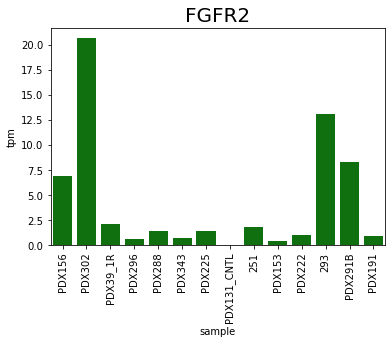

In [177]:
data = fgfr_df[fgfr_df['Gene name']=='FGFR2']
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,color='green')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR2',size=20)

Text(0.5, 1.0, 'FGFR1')

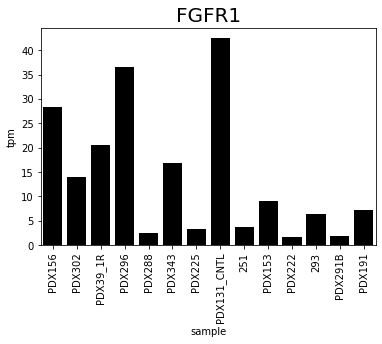

In [178]:
data = fgfr_df[fgfr_df['Gene name']=='FGFR1']
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,color='black')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR1',size=20)

Text(0.5, 1.0, 'FGFR3')

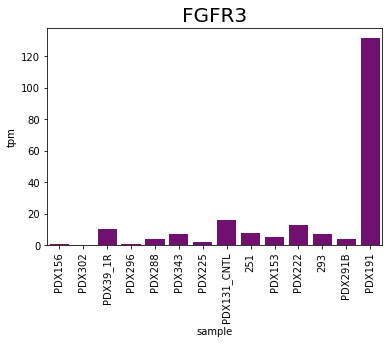

In [179]:
data = fgfr_df[fgfr_df['Gene name']=='FGFR3']
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,color='purple')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR3',size=20)

Text(0.5, 1.0, 'FGFR4')

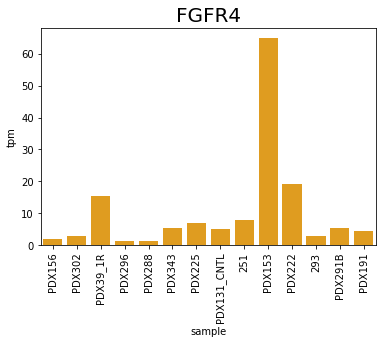

In [180]:
data = fgfr_df[fgfr_df['Gene name']=='FGFR4']
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,color='orange')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR4',size=20)

In [181]:
def heatmap (matrix,x=2,y=8,cmap='Reds',norm=False):
    
    matrix = matrix.reindex(columns=samples_by_resp)
    
    if norm == True:
        matrix = matrix.div(matrix.max(axis=1), axis=0)
    plt.figure(figsize=(x,y))
    sns.heatmap(matrix,cmap=cmap,linewidths=1,linecolor='white')
    
    plt.text(x=3,y=-1,s='NON-RESP')
    plt.text(x=11,y=-1,s='RESP')
    plt.text(x=0,y=-0.7,s='____________________________________________________________')
    plt.text(x=8.1,y=-0.7,s='____________________________________________')

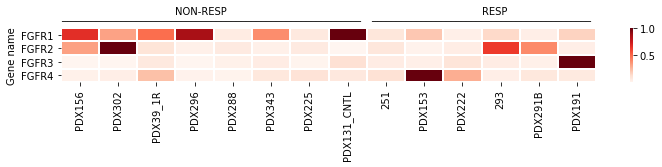

In [182]:
heatmap(matrix_fgfr_df,x=12,y=1,norm=True) #normalised colors by row (gene)

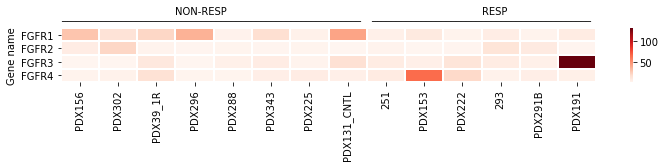

In [183]:
heatmap(matrix_fgfr_df,x=12,y=1) #not normalized

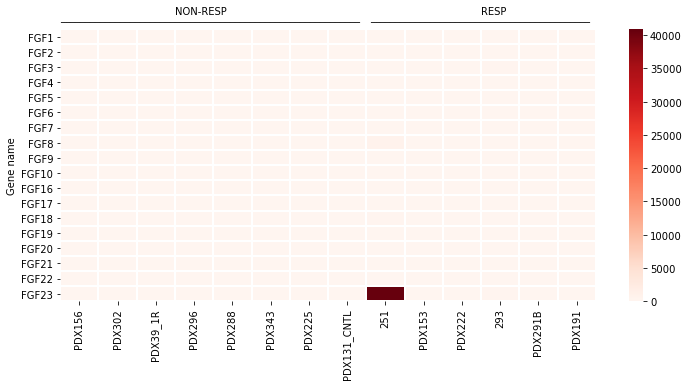

In [184]:
fgfs = ['FGF1','FGF2','FGF3','FGF4','FGF5','FGF6','FGF7','FGF8','FGF9','FGF10',
        'FGF16','FGF17','FGF18','FGF19','FGF20','FGF21','FGF22','FGF23']
#PDX325
fgfr_df = df[['sample','Gene name','tpm']][df['Gene name'].isin(fgfs)].groupby(['sample','Gene name'],as_index=False).max()
samples = fgfr_df['sample'].tolist()
samples = list(set(samples))
matrix_df = pd.DataFrame({'Gene name':fgfs})
for sample in samples:
    sample1_df = fgfr_df[fgfr_df['sample']==sample]
    sample1_df = sample1_df.rename(columns={'tpm':sample})
    sample1_df.drop(columns='sample',inplace=True)
    sample1_df = sample1_df[['Gene name',sample]]
    matrix_df = pd.merge(matrix_df,sample1_df,how='left')
matrix_df = matrix_df.set_index('Gene name')
heatmap(matrix_df,x=12,y=5) #not normalized

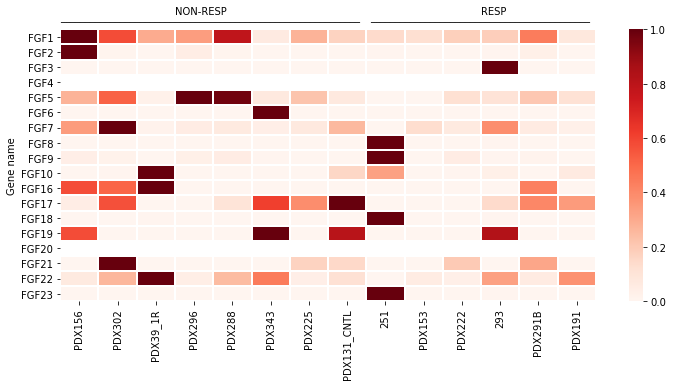

In [185]:
heatmap(matrix_df,x=12,y=5,norm=True) #not normalized

### Check all counts (quality of the sample)

[Text(0, 0, '118JAL_CNTL'),
 Text(1, 0, '173JAL_CNTL'),
 Text(2, 0, '251'),
 Text(3, 0, '251JAL'),
 Text(4, 0, '293'),
 Text(5, 0, '98_CNTL'),
 Text(6, 0, 'JAL347'),
 Text(7, 0, 'PDX131_CNTL'),
 Text(8, 0, 'PDX153'),
 Text(9, 0, 'PDX153_CNTL'),
 Text(10, 0, 'PDX156'),
 Text(11, 0, 'PDX191'),
 Text(12, 0, 'PDX222'),
 Text(13, 0, 'PDX225'),
 Text(14, 0, 'PDX244'),
 Text(15, 0, 'PDX244LR'),
 Text(16, 0, 'PDX244LR1'),
 Text(17, 0, 'PDX284JAL'),
 Text(18, 0, 'PDX287'),
 Text(19, 0, 'PDX288'),
 Text(20, 0, 'PDX291B'),
 Text(21, 0, 'PDX296'),
 Text(22, 0, 'PDX302'),
 Text(23, 0, 'PDX313'),
 Text(24, 0, 'PDX319'),
 Text(25, 0, 'PDX329'),
 Text(26, 0, 'PDX343'),
 Text(27, 0, 'PDX39_1R'),
 Text(28, 0, 'PDX4_CNTL')]

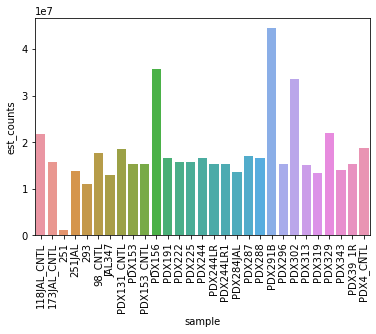

In [186]:
all_counts_df = df.groupby('sample',as_index=False).sum()
all_counts_df[['tpm']]
g = sns.barplot(x=all_counts_df['sample'],y=all_counts_df['est_counts'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

## TF analysis

In [63]:
gh_df = pd.read_excel('data/GeneHancer_version_4-4.xlsx')
gh_df

,chrom,source,feature name,start,end,score,strand,frame,attributes
0,chr2,GeneHancer,Enhancer,70017801,70018000,0.52,.,.,genehancer_id=GH02F070017;connected_gene=PCBP1...
1,chr18,GeneHancer,Enhancer,48592690,48592839,0.96,.,.,genehancer_id=GH18F048592;connected_gene=ENSG0...
2,chr5,GeneHancer,Enhancer,168312357,168319217,1.77,.,.,genehancer_id=GH05F168312;connected_gene=WWC1;...
3,chr12,GeneHancer,Enhancer,47204578,47219611,1.28,.,.,genehancer_id=GH12F047204;connected_gene=RPAP3...
4,chr21,GeneHancer,Enhancer,39630072,39635066,1.29,.,.,genehancer_id=GH21F039630;connected_gene=B3GAL...
...,...,...,...,...,...,...,...,...,...
218112,chr10,GeneHancer,Enhancer,44334083,44335821,0.71,.,.,genehancer_id=GH10F044334;connected_gene=LOC10...
218113,chr9,GeneHancer,Enhancer,80873797,80874459,0.25,.,.,genehancer_id=GH09F080873;connected_gene=LOC10...
218114,chr9,GeneHancer,Enhancer,98305468,98307965,0.59,.,.,genehancer_id=GH09F098305;connected_gene=TBC1D...
218115,chr20,GeneHancer,Enhancer,5602988,5606828,0.65,.,.,genehancer_id=GH20F005602;connected_gene=LOC64...


In [64]:
attributes = gh_df['attributes'].tolist()
attributes[0]

'genehancer_id=GH02F070017;connected_gene=PCBP1-AS1;score=12.90;connected_gene=ASPRV1;score=11.69;connected_gene=PIR47967;score=0.29;connected_gene=RN7SL470P;score=0.20'

In [60]:
gh_df['gh_id'] = gh_df['attributes'].str.split(';',expand=True)[0].str.split('=',expand=True)[1]
gh_df['gene'] = gh_df['attributes'].str.split(';',expand=True)[1].str.split('=',expand=True)[1]
gh_df = gh_df[['gh_id','gene','score']]
gh_df

,gh_id,gene,score
0,GH02F070017,PCBP1-AS1,0.52
1,GH18F048592,ENSG00000278983,0.96
2,GH05F168312,WWC1,1.77
3,GH12F047204,RPAP3,1.28
4,GH21F039630,B3GALT5-AS1,1.29
...,...,...,...
218112,GH10F044334,LOC101929465,0.71
218113,GH09F080873,LOC105376105,0.25
218114,GH09F098305,TBC1D2,0.59
218115,GH20F005602,LOC643406,0.65


In [61]:
gh_df[gh_df['gene']=='FGFR2']

,gh_id,gene,score
3984,GH10F121528,FGFR2,0.52
7614,GH10F121157,FGFR2,1.29
33936,GH10F121459,FGFR2,1.35
37367,GH10F121595,FGFR2,0.56
37442,GH10F121574,FGFR2,0.25
55785,GH10F121535,FGFR2,0.25
60386,GH10F121509,FGFR2,0.32
82035,GH10F121526,FGFR2,0.25
92318,GH10F121540,FGFR2,0.46
98147,GH10F121527,FGFR2,0.38


In [48]:
gh_df[gh_df['gene']=='FGFR3']

NameError: name 'gh_df' is not defined

In [187]:
with open('data/tf_FGFR2.txt') as f:
    tf_fgfr2 = f.read().splitlines()
tf_fgfr2

['HNRNPL',
 'TEAD4',
 'PRDM10',
 'ZNF629',
 'RFX1',
 'KDM1A',
 'ZNF692',
 'PRDM1',
 'ZIC2',
 'ZSCAN4',
 'PATZ1',
 'CTCF',
 'ZNF501',
 'POLR2A',
 'ZNF600',
 'ZNF341',
 'ZNF37A',
 'ZFX',
 'CEBPA',
 'ZNF561',
 'ARNT',
 'NONO',
 'KLF9',
 'ZBTB20',
 'SP2',
 'RAD21',
 'ZNF524',
 'ZXDB',
 'CTBP1',
 'ZBTB10',
 'BMI1',
 'RNF2',
 'ZNF580',
 'BCL11A',
 'ZBTB48',
 'ZBTB26',
 'ZBTB17',
 'YY1',
 'SCRT1',
 'TFDP1',
 'FOXM1',
 'ZFHX2',
 'KLF8',
 'ZNF777',
 'ZNF189',
 'ELF1',
 'ZNF335',
 'ZNF610',
 'GABPB1',
 'ZFP69B',
 'ETS1',
 'SKIL',
 'KLF17',
 'ZNF768',
 'HIC1',
 'ZSCAN5A',
 'SIN3A',
 'CEBPB',
 'SMAD4',
 'BCL6',
 'PAX8',
 'ZNF366',
 'VEZF1',
 'NRF1',
 'ZNF324',
 'MAFK',
 'ZNF660',
 'GLIS1',
 'TRIM28',
 'ZNF398',
 'ZNF2',
 'ZNF143',
 'KLF10',
 'KLF16',
 'SP3',
 'ZMYM3',
 'TAF1',
 'NANOG',
 'GTF2F1',
 'TBP',
 'RB1',
 'NFYC',
 'EGR2',
 'L3MBTL2',
 'RBPJ',
 'SP1',
 'ZNF362',
 'ELF3',
 'POU5F1',
 'EGR1',
 'CEBPG',
 'MZF1',
 'SP7',
 'ZBTB7A',
 'JUND',
 'EZH2',
 'GLIS2',
 'ZBTB8A',
 'PKNOX1',
 'ZEB2']

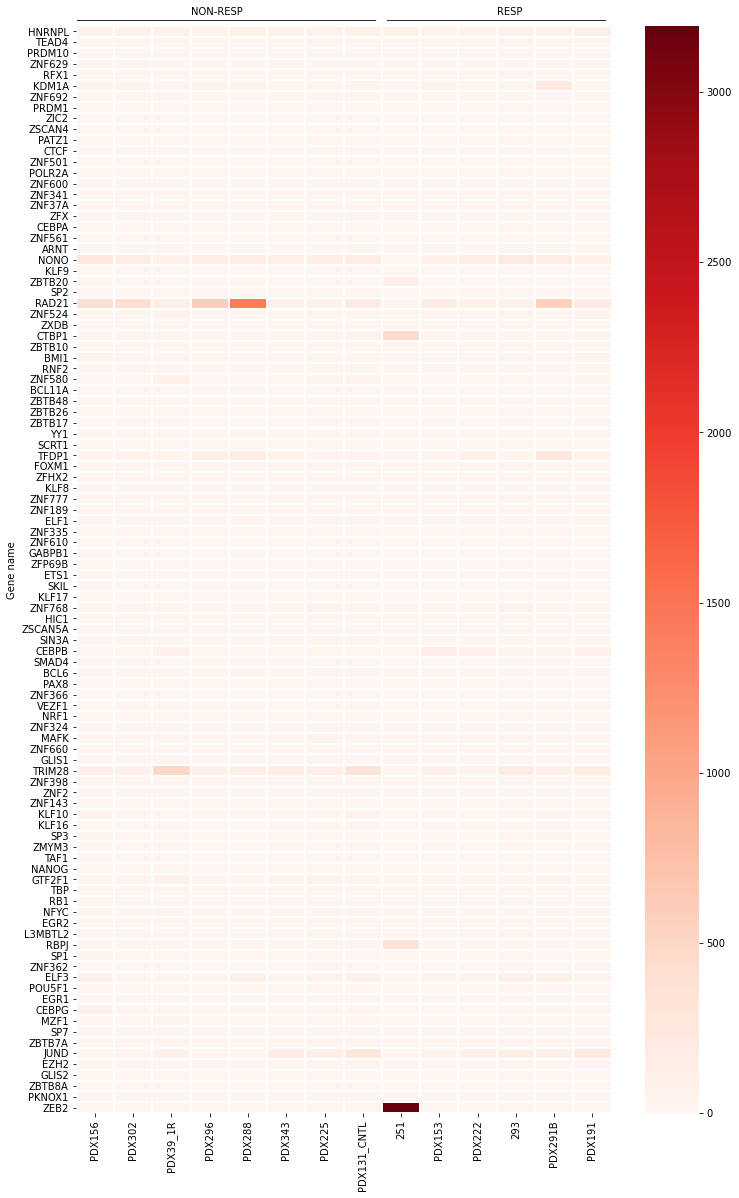

In [188]:
fgfr_df = df[['sample','Gene name','tpm']][df['Gene name'].isin(tf_fgfr2)].groupby(['sample','Gene name'],as_index=False).max()
samples = fgfr_df['sample'].tolist()
samples = list(set(samples))
matrix_df = pd.DataFrame({'Gene name':tf_fgfr2})
for sample in samples:
    sample1_df = fgfr_df[fgfr_df['sample']==sample]
    sample1_df = sample1_df.rename(columns={'tpm':sample})
    sample1_df.drop(columns='sample',inplace=True)
    sample1_df = sample1_df[['Gene name',sample]]
    matrix_df = pd.merge(matrix_df,sample1_df,how='left')
matrix_df = matrix_df.set_index('Gene name')
heatmap(matrix_df,x=12,y=20) #not normalized

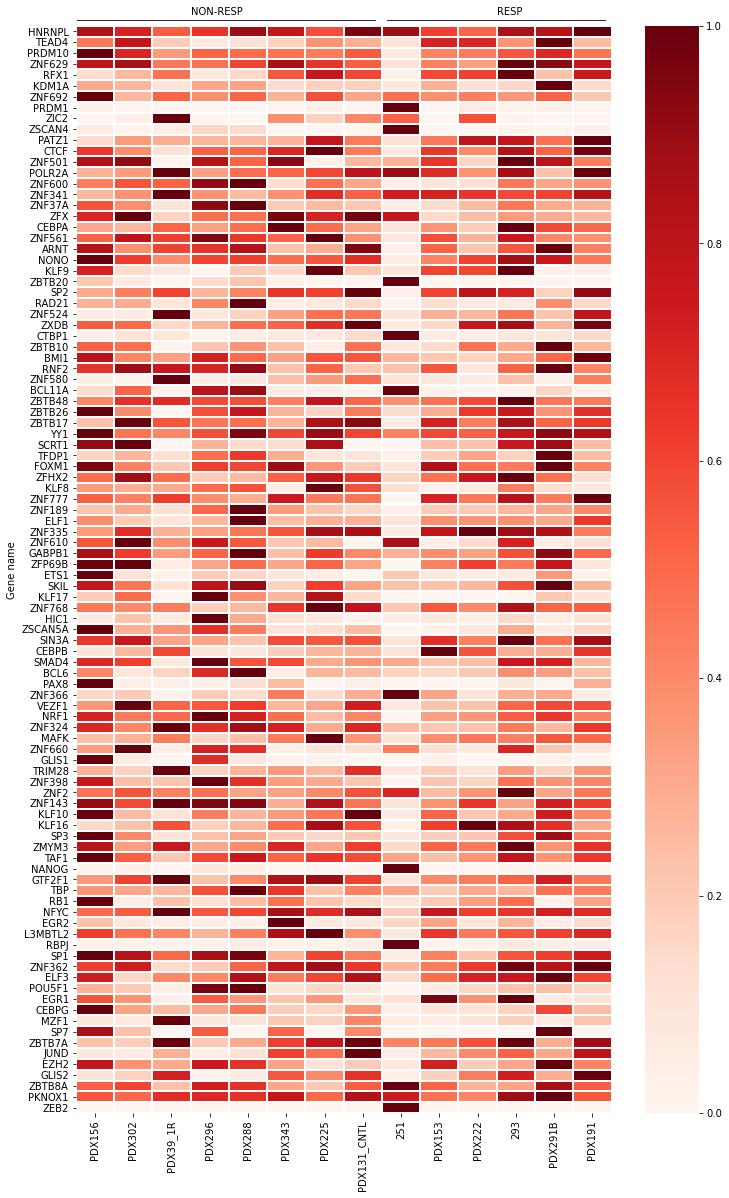

In [189]:
heatmap(matrix_df,x=12,y=20,norm=True) #not normalized

In [190]:
with open('data/tf_FGFR3_GH04J001775.txt') as f:
    tf_fgfr3_75 = f.read().splitlines()
with open('data/tf_FGFR3_GH04J001782.txt') as f:
    tf_fgfr3_82 = f.read().splitlines()
with open('data/tf_FGFR3_GH04J001784.txt') as f:
    tf_fgfr3_84 = f.read().splitlines()
with open('data/tf_FGFR3_GH04J001792.txt') as f:
    tf_fgfr3_92 = f.read().splitlines()
with open('data/tf_FGFR3_GH04J001816.txt') as f:
    tf_fgfr3_16 = f.read().splitlines()
tf_fgfr3_75

['HNRNPL',
 'GATAD2A',
 'ZBTB33',
 'TEAD4',
 'TFE3',
 'NFKBIZ',
 'KDM1A',
 'RCOR2',
 'RBFOX2',
 'RXRB',
 'IRF2',
 'ZNF600',
 'KMT2B',
 'SOX13',
 'KLF9',
 'ZFX',
 'KLF7',
 'ESR1',
 'RNF2',
 'ZKSCAN8',
 'TGIF2',
 'ZNF444',
 'CHD2',
 'MAX',
 'ZBTB25',
 'PKNOX1',
 'TEAD1',
 'TFDP1',
 'KDM6A',
 'PCBP1',
 'CREM',
 'PTBP1',
 'ZSCAN9',
 'BCOR',
 'ZNF792',
 'SAP130',
 'DPF2',
 'ELF1',
 'MIER3',
 'POLR2A',
 'STAT1',
 'GABPB1',
 'RCOR1',
 'ZNF511',
 'KLF6',
 'ZGPAT',
 'MXD4',
 'DNMT3B',
 'GATAD1',
 'KLF17',
 'DRAP1',
 'ZMYM3',
 'ZNF143',
 'SMAD4',
 'BCL6',
 'TFAP4',
 'CHD4',
 'ZNF687',
 'KLF11',
 'MAZ',
 'ZFP64',
 'NFIL3',
 'IKZF5',
 'NR2C2',
 'THAP11',
 'ZNF3',
 'RARA',
 'CTCF',
 'NFIA',
 'DMAP1',
 'GLIS1',
 'THRB',
 'ARID4B',
 'ETV4',
 'FOS',
 'MEIS2',
 'TEAD3',
 'NR2F6',
 'KDM3A',
 'KLF16',
 'XRCC5',
 'ZNF48',
 'KLF1',
 'MIER2',
 'NR2F1',
 'MXD3',
 'RAD21',
 'SOX5',
 'GTF2F1',
 'MYC',
 'ARID3A',
 'ZNF580',
 'ZFP36',
 'NFYC',
 'RBPJ',
 'SP1',
 'BHLHE40',
 'ELF3',
 'FOXA3',
 'MLX',
 'POU5F1',
 '

In [191]:
tf_fgfr3 = tf_fgfr3_75 + tf_fgfr3_82 + tf_fgfr3_84 + tf_fgfr3_92 + tf_fgfr3_16
print(len(tf_fgfr3))
tf_fgfr3 = list(set(tf_fgfr3))
print(len(tf_fgfr3))

453
252


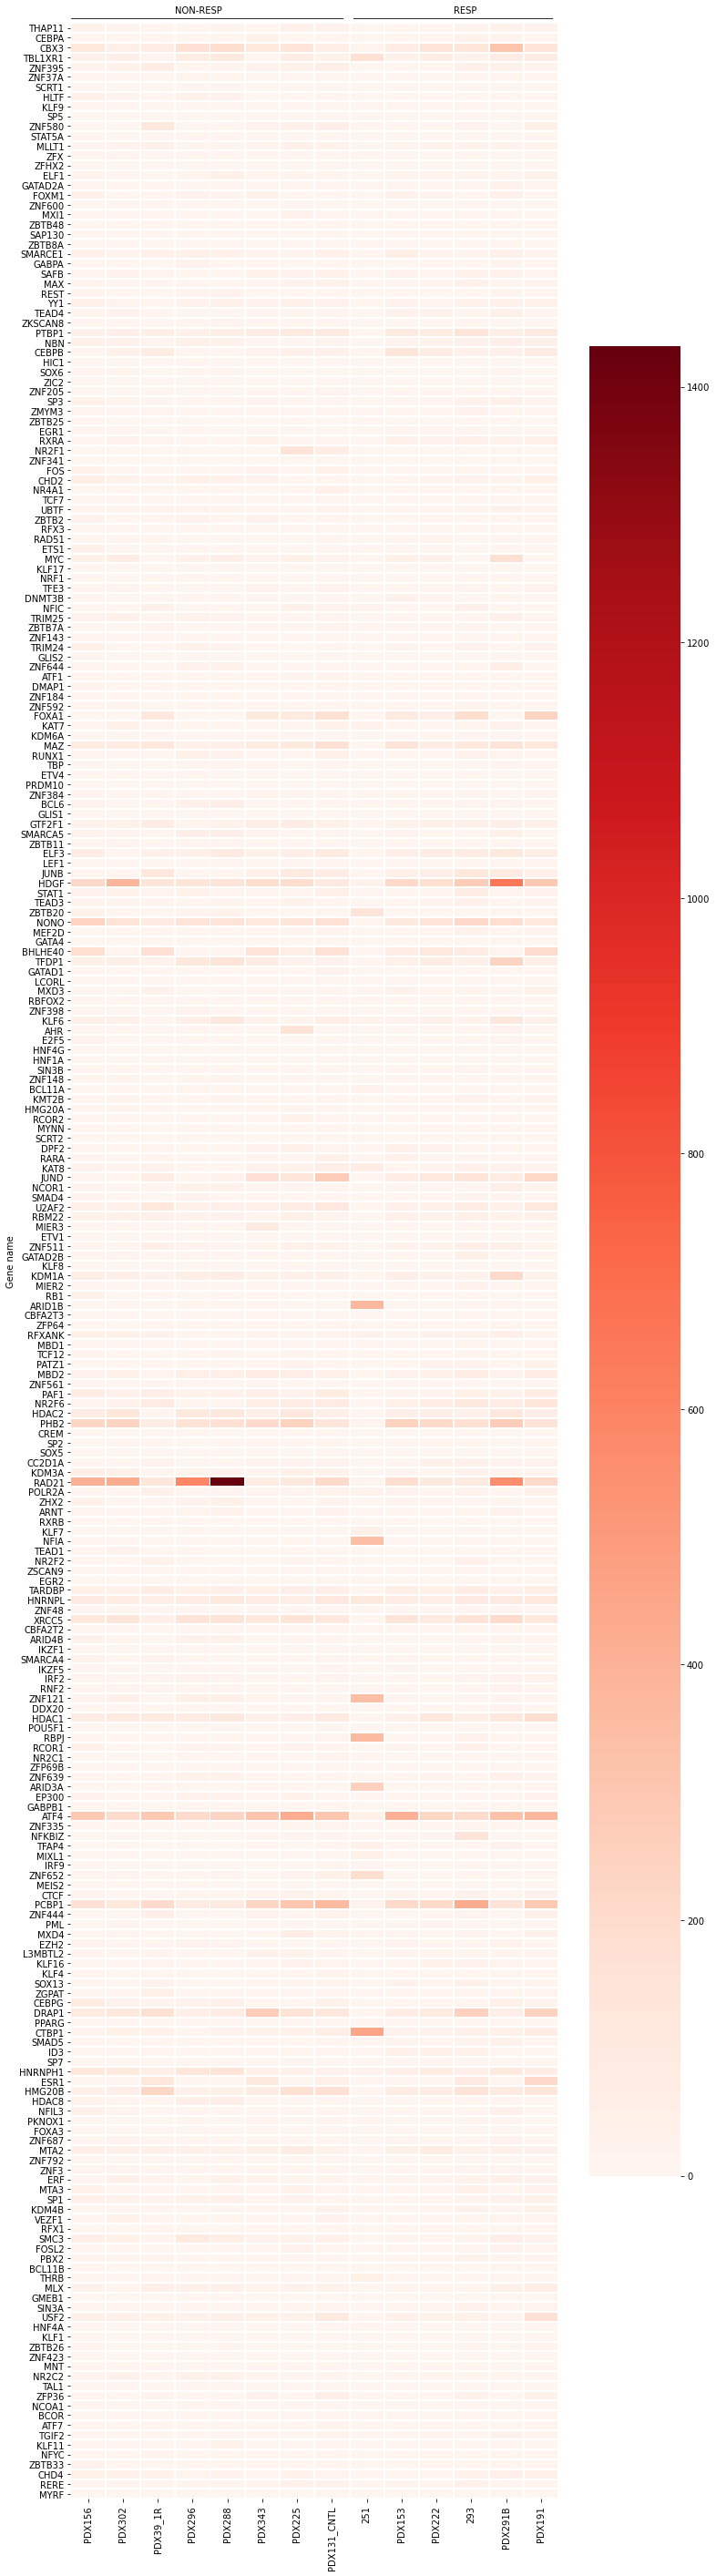

In [192]:
fgfr_df = df[['sample','Gene name','tpm']][df['Gene name'].isin(tf_fgfr3)].groupby(['sample','Gene name'],as_index=False).max()
samples = fgfr_df['sample'].tolist()
samples = list(set(samples))
matrix_df = pd.DataFrame({'Gene name':tf_fgfr3})
for sample in samples:
    sample1_df = fgfr_df[fgfr_df['sample']==sample]
    sample1_df = sample1_df.rename(columns={'tpm':sample})
    sample1_df.drop(columns='sample',inplace=True)
    sample1_df = sample1_df[['Gene name',sample]]
    matrix_df = pd.merge(matrix_df,sample1_df,how='left')
matrix_df = matrix_df.set_index('Gene name')
heatmap(matrix_df,x=12,y=50) #not normalized

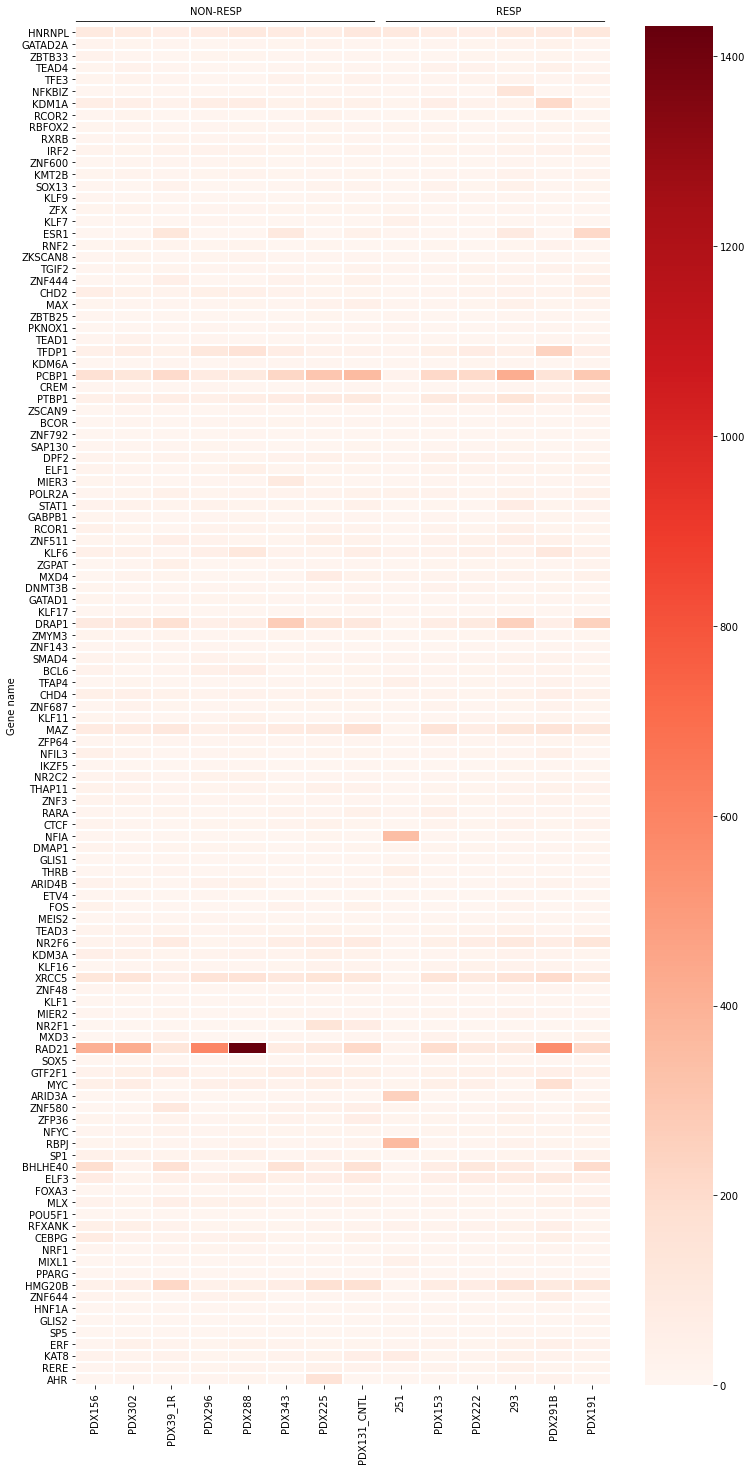

In [193]:
fgfr_df = df[['sample','Gene name','tpm']][df['Gene name'].isin(tf_fgfr3_75)].groupby(['sample','Gene name'],as_index=False).max()
samples = fgfr_df['sample'].tolist()
samples = list(set(samples))
matrix_df = pd.DataFrame({'Gene name':tf_fgfr3_75})
for sample in samples:
    sample1_df = fgfr_df[fgfr_df['sample']==sample]
    sample1_df = sample1_df.rename(columns={'tpm':sample})
    sample1_df.drop(columns='sample',inplace=True)
    sample1_df = sample1_df[['Gene name',sample]]
    matrix_df = pd.merge(matrix_df,sample1_df,how='left')
matrix_df = matrix_df.set_index('Gene name')
heatmap(matrix_df,x=12,y=25) #not normalized

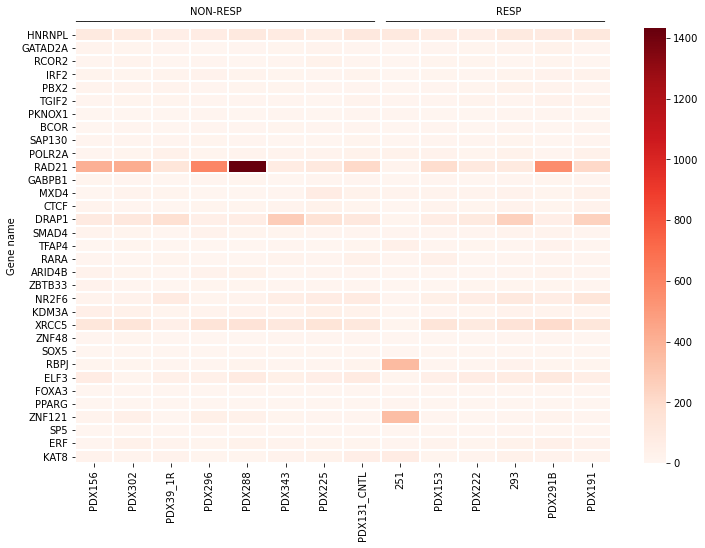

In [194]:
fgfr_df = df[['sample','Gene name','tpm']][df['Gene name'].isin(tf_fgfr3_82)].groupby(['sample','Gene name'],as_index=False).max()
samples = fgfr_df['sample'].tolist()
samples = list(set(samples))
matrix_df = pd.DataFrame({'Gene name':tf_fgfr3_82})
for sample in samples:
    sample1_df = fgfr_df[fgfr_df['sample']==sample]
    sample1_df = sample1_df.rename(columns={'tpm':sample})
    sample1_df.drop(columns='sample',inplace=True)
    sample1_df = sample1_df[['Gene name',sample]]
    matrix_df = pd.merge(matrix_df,sample1_df,how='left')
matrix_df = matrix_df.set_index('Gene name')
heatmap(matrix_df,x=12,y=8) #not normalized

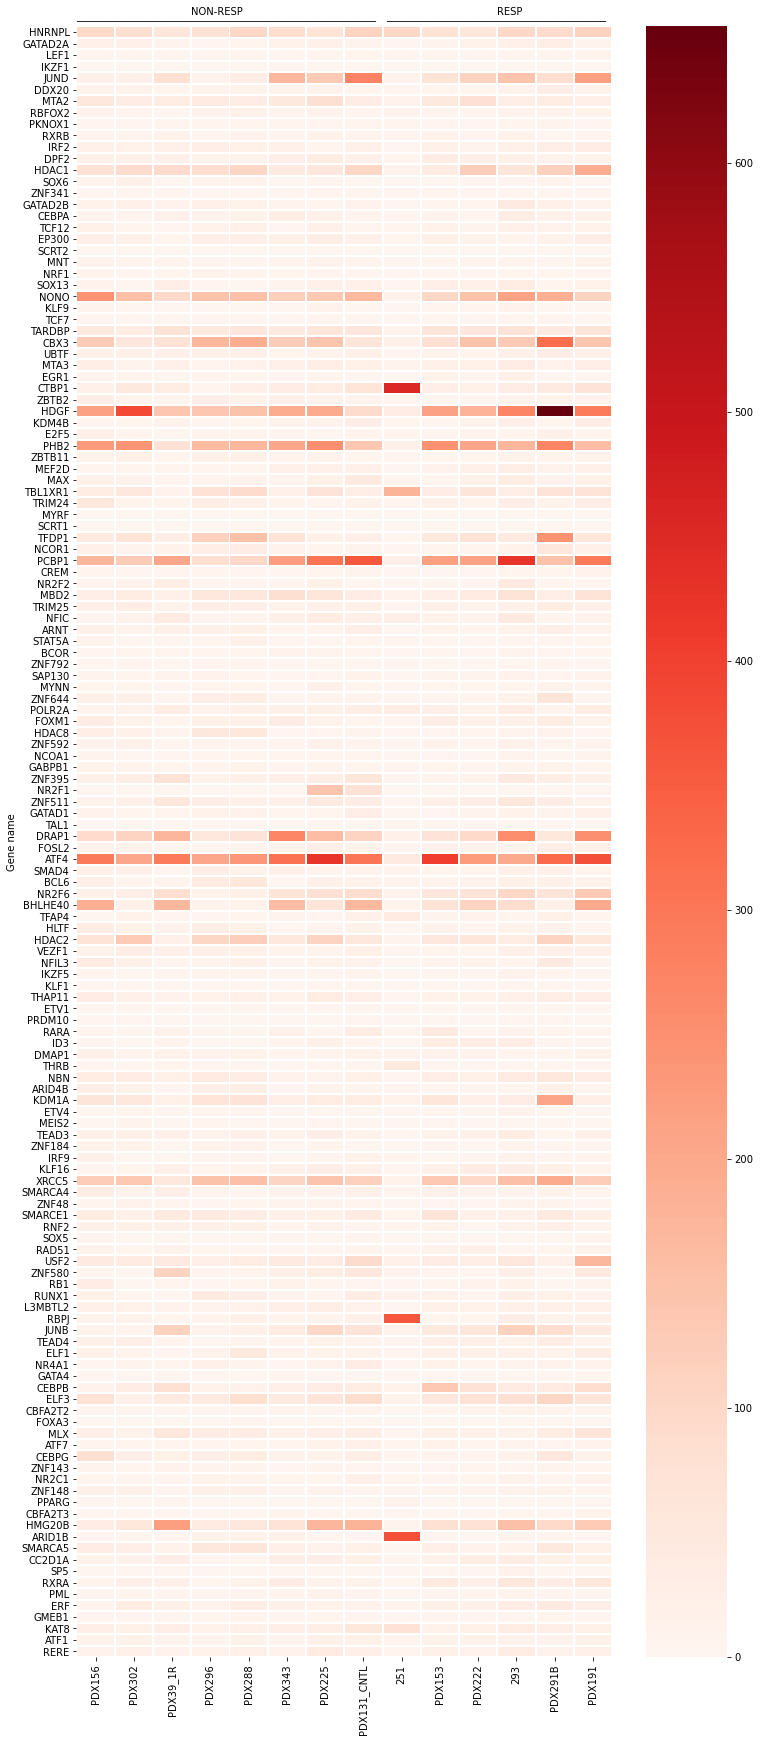

In [195]:
fgfr_df = df[['sample','Gene name','tpm']][df['Gene name'].isin(tf_fgfr3_84)].groupby(['sample','Gene name'],as_index=False).max()
samples = fgfr_df['sample'].tolist()
samples = list(set(samples))
matrix_df = pd.DataFrame({'Gene name':tf_fgfr3_84})
for sample in samples:
    sample1_df = fgfr_df[fgfr_df['sample']==sample]
    sample1_df = sample1_df.rename(columns={'tpm':sample})
    sample1_df.drop(columns='sample',inplace=True)
    sample1_df = sample1_df[['Gene name',sample]]
    matrix_df = pd.merge(matrix_df,sample1_df,how='left')
matrix_df = matrix_df.set_index('Gene name')
heatmap(matrix_df,x=12,y=30) #not normalized

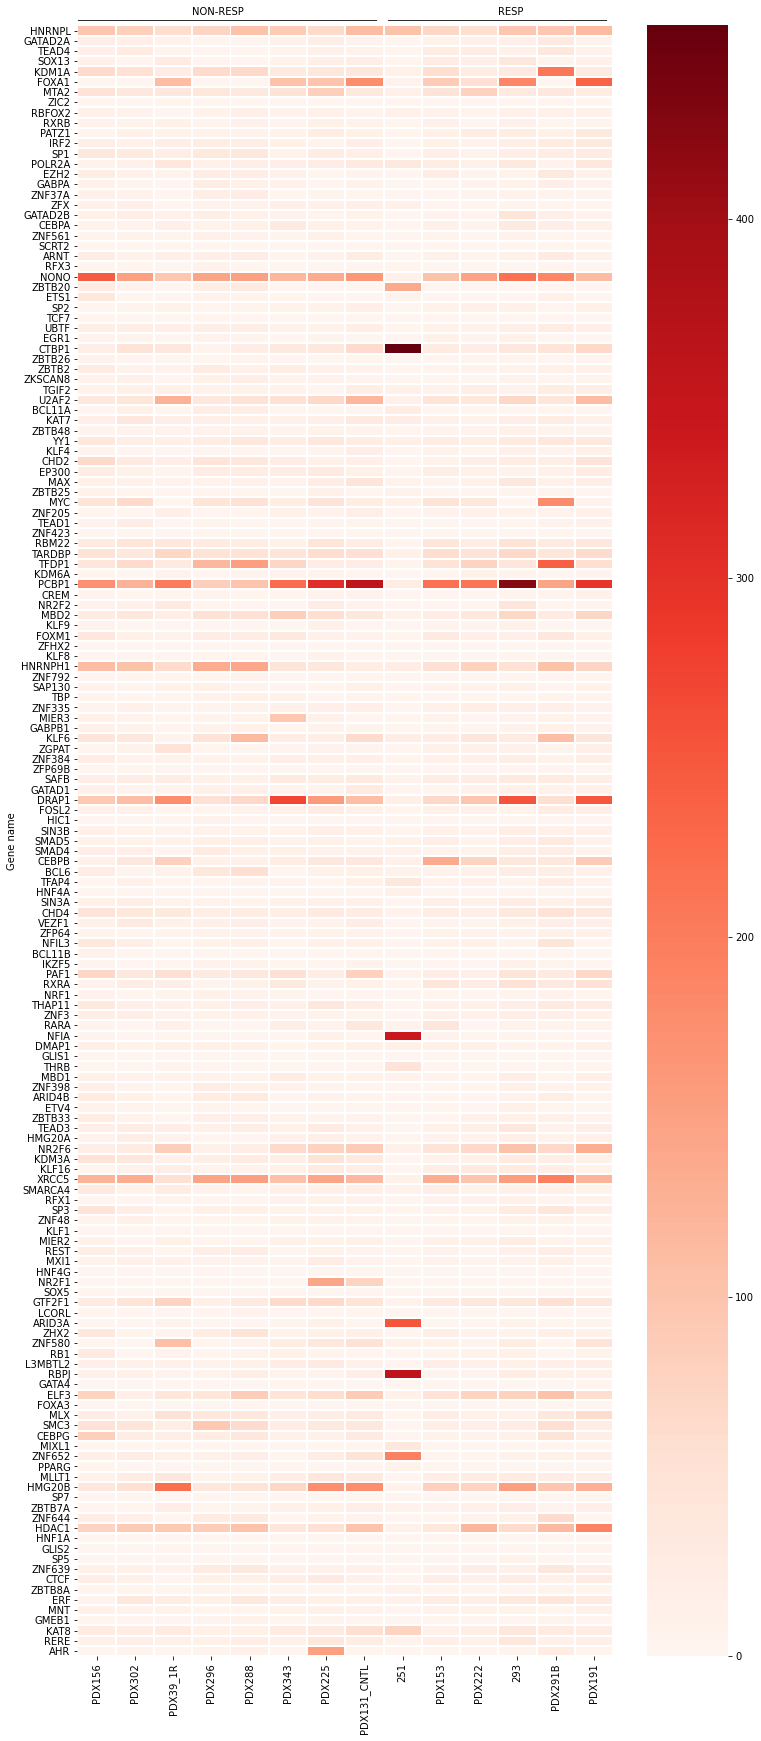

In [196]:
fgfr_df = df[['sample','Gene name','tpm']][df['Gene name'].isin(tf_fgfr3_92)].groupby(['sample','Gene name'],as_index=False).max()
samples = fgfr_df['sample'].tolist()
samples = list(set(samples))
matrix_df = pd.DataFrame({'Gene name':tf_fgfr3_92})
for sample in samples:
    sample1_df = fgfr_df[fgfr_df['sample']==sample]
    sample1_df = sample1_df.rename(columns={'tpm':sample})
    sample1_df.drop(columns='sample',inplace=True)
    sample1_df = sample1_df[['Gene name',sample]]
    matrix_df = pd.merge(matrix_df,sample1_df,how='left')
matrix_df = matrix_df.set_index('Gene name')
heatmap(matrix_df,x=12,y=30) #not normalized

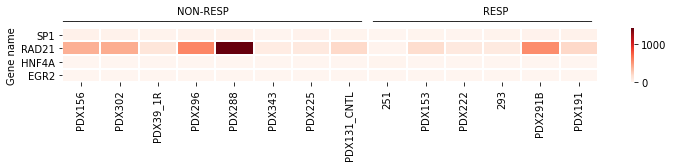

In [197]:
fgfr_df = df[['sample','Gene name','tpm']][df['Gene name'].isin(tf_fgfr3_16)].groupby(['sample','Gene name'],as_index=False).max()
samples = fgfr_df['sample'].tolist()
samples = list(set(samples))
matrix_df = pd.DataFrame({'Gene name':tf_fgfr3_16})
for sample in samples:
    sample1_df = fgfr_df[fgfr_df['sample']==sample]
    sample1_df = sample1_df.rename(columns={'tpm':sample})
    sample1_df.drop(columns='sample',inplace=True)
    sample1_df = sample1_df[['Gene name',sample]]
    matrix_df = pd.merge(matrix_df,sample1_df,how='left')
matrix_df = matrix_df.set_index('Gene name')
heatmap(matrix_df,x=12,y=1 )#not normalized

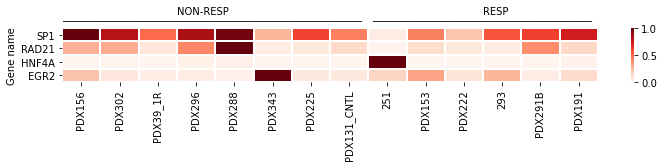

In [199]:
heatmap(matrix_df,x=12,y=1,norm=True) #not normalized

## Find correlations

In [202]:
from scipy import stats

In [203]:
fgfr3_df = df[['sample','Gene name','tpm']][df['Gene name']=='FGFR3'].groupby(['sample'],as_index=False).max()
fgfr3_df = fgfr3_df.rename(columns={'tpm':'FGFR3'})
fgfr3_df.drop(columns=['Gene name'],inplace=True)
for tf in tqdm(tf_fgfr3):
    tf1_df = df[['sample','Gene name','tpm']][df['Gene name']==tf].groupby(['sample','Gene name'],as_index=False).max()
    tf1_df = tf1_df.rename(columns={'tpm':tf})
    tf1_df.drop(columns=['Gene name'],inplace=True)
    try:
        tf_fgfr3_df = pd.merge(tf_fgfr3_df,tf1_df,how='outer')
    except:
        tf_fgfr3_df = pd.merge(fgfr3_df,tf1_df,how='outer')
tf_fgfr3_df

,sample,FGFR3,MYRF,THAP11,CEBPA,CBX3,TBL1XR1,ZNF395,ZNF37A,SCRT1,...,ZFP36,NCOA1,BCOR,ATF7,TGIF2,KLF11,NFYC,ZBTB33,CHD4,RERE
0,118JAL_CNTL,14.909600,1.113440,26.00880,23.38920,57.2228,29.5056,14.50220,2.74583,0.059949,...,34.54130,7.01294,11.16100,12.18890,5.25377,8.749100,15.07270,5.97191,30.73980,13.34990
1,173JAL_CNTL,9.108140,0.406719,23.26880,8.78556,124.0960,18.9858,22.76570,3.71615,0.009970,...,19.61510,1.49426,4.39659,9.38978,16.87320,3.056130,12.01490,15.86260,30.65550,14.08420
2,251,7.440180,0.000000,2.83009,3.02400,17.0472,178.2670,3.72222,1.07805,0.000000,...,14.13080,1.17673,4.16041,5.72133,10.72820,0.496175,3.72510,1.46470,7.24606,7.22921
3,251JAL,4.502910,0.434205,37.10350,25.21410,86.5287,43.7711,28.98050,6.07432,0.041522,...,33.65570,14.49320,7.02003,14.92760,18.33270,11.107100,22.30810,18.76990,16.41970,11.64170
4,293,7.342440,0.419122,17.93340,31.40950,132.5360,28.3746,43.37570,9.90611,0.069442,...,30.50800,9.46909,8.76868,8.58123,8.41470,4.216980,12.28490,15.91990,32.00640,36.85700
5,98_CNTL,0.300336,0.955494,46.44540,10.34030,108.5720,32.9138,15.10090,5.98282,0.031515,...,12.95210,3.67355,7.72921,15.60600,37.51460,9.673250,9.33367,13.47270,23.75450,16.63500
6,JAL347,3.175780,0.725682,29.09320,3.00122,72.7414,28.1722,16.56860,4.62404,0.054110,...,38.95980,3.07454,5.60919,3.91720,9.52988,14.355300,12.41870,9.22118,14.85340,19.00870
7,PDX131_CNTL,15.795500,0.467198,23.28840,10.16330,62.5149,30.0733,57.78360,4.53154,0.000000,...,59.14830,6.39339,6.43882,18.19730,21.10080,6.424240,16.21840,8.67096,21.51560,25.32370
8,PDX153,5.033210,0.640920,13.95560,11.46430,77.3505,33.8050,7.83144,3.15527,0.021645,...,11.91940,2.81277,7.13225,14.13380,8.49572,4.248400,14.50570,2.81298,22.11610,17.07970
9,PDX153_CNTL,5.033210,0.640920,13.95560,11.46430,77.3505,33.8050,7.83144,3.15527,0.021645,...,11.91940,2.81277,7.13225,14.13380,8.49572,4.248400,14.50570,2.81298,22.11610,17.07970


In [204]:
corr_df = tf_fgfr3_df.corr()
corr_df

,FGFR3,MYRF,THAP11,CEBPA,CBX3,TBL1XR1,ZNF395,ZNF37A,SCRT1,HLTF,...,ZFP36,NCOA1,BCOR,ATF7,TGIF2,KLF11,NFYC,ZBTB33,CHD4,RERE
FGFR3,1.000000,-0.026897,-0.028679,0.040395,-0.067351,-0.042233,0.054152,-0.110353,-0.064066,-0.244066,...,0.214494,0.238737,-0.114499,0.088834,0.184992,-0.090042,0.240588,-0.119845,0.283005,-0.014508
MYRF,-0.026897,1.000000,0.267851,-0.208983,0.217521,0.061477,-0.113558,0.446679,0.192066,0.548657,...,-0.265276,0.016698,0.138080,-0.204830,0.082912,0.434806,0.064959,0.240796,0.431257,-0.139406
THAP11,-0.028679,0.267851,1.000000,-0.318369,0.445242,0.221019,-0.158987,0.030137,-0.035458,0.102092,...,-0.174470,-0.055020,0.443198,0.053473,0.641941,0.022186,-0.100104,0.004827,0.126978,-0.275932
CEBPA,0.040395,-0.208983,-0.318369,1.000000,-0.064493,-0.134313,0.456360,0.096820,0.264920,0.151254,...,0.445051,0.610560,0.146363,0.345270,-0.471427,-0.054291,0.217899,0.398941,0.238464,0.469082
CBX3,-0.067351,0.217521,0.445242,-0.064493,1.000000,0.206473,-0.046403,0.436313,-0.086382,0.199439,...,-0.411448,-0.163823,0.351435,-0.227779,0.167592,0.042938,-0.301295,0.177380,0.175928,-0.141800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KLF11,-0.090042,0.434806,0.022186,-0.054291,0.042938,-0.098578,-0.153923,0.536226,0.234303,0.353104,...,0.040643,0.122087,-0.283702,-0.174169,0.075870,1.000000,0.180670,0.406603,0.268937,-0.002827
NFYC,0.240588,0.064959,-0.100104,0.217899,-0.301295,-0.443740,0.366355,-0.238134,0.168986,-0.139099,...,0.309868,0.394795,-0.166160,0.193329,0.136473,0.180670,1.000000,-0.046007,0.206322,0.103093
ZBTB33,-0.119845,0.240796,0.004827,0.398941,0.177380,-0.154091,0.134695,0.609953,0.300439,0.685187,...,0.171153,0.486332,-0.218970,0.103712,-0.154734,0.406603,-0.046007,1.000000,0.266465,0.175960
CHD4,0.283005,0.431257,0.126978,0.238464,0.175928,-0.131028,0.274836,0.108883,0.442770,0.343741,...,-0.083631,0.089952,-0.184466,-0.122858,0.161980,0.268937,0.206322,0.266465,1.000000,0.051329


In [205]:
corr_df[['FGFR3']][corr_df['FGFR3']>0.5].sort_values('FGFR3',ascending=False)

,FGFR3
FGFR3,1.000000
USF2,0.788853
HDAC1,0.629818
SOX5,0.594405
LEF1,0.578866
CBFA2T3,0.552489
MXD3,0.551495
KDM4B,0.509751


Text(0.5, 1.0, 'FGFR3 vs. USF2')

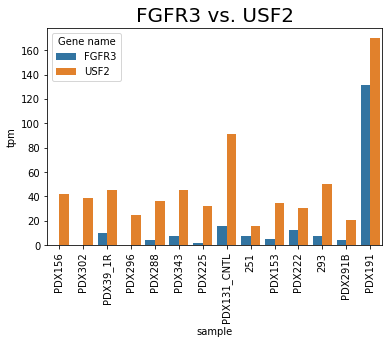

In [206]:
max_df = df[['sample','Gene name','tpm']].groupby(['sample','Gene name'],as_index=False).max()
tf = 'USF2'
data = max_df[(max_df['Gene name']==tf)|(max_df['Gene name']=='FGFR3')]
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,hue='Gene name')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR3 vs. USF2',size=20)

Text(0, 0.5, 'USF2')

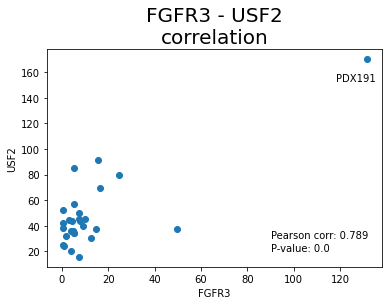

In [207]:
x = data['tpm'][data['Gene name']=='FGFR3']
y = data['tpm'][data['Gene name']=='USF2']
pearson, pvalue = stats.pearsonr(x,y)
pearson = round(pearson,3)
pvalue = round(pvalue,3)
pearson = 'Pearson corr: ' + str(pearson)
pvalue = 'P-value: '+ str(pvalue)
plt.scatter(x=x,y=y)
plt.title('FGFR3 - USF2\ncorrelation',size=20)
x = data[['tpm']][(data['Gene name']=='FGFR3')&(data['sample']=='PDX191')].iloc[0][0]
y = data[['tpm']][(data['Gene name']=='USF2')&(data['sample']=='PDX191')].iloc[0][0]
plt.text(x=x*0.9,y=y*0.9,s='PDX191')
plt.text(x=90,y=30,s=pearson)
plt.text(x=90,y=20,s=pvalue)
plt.xlabel('FGFR3')
plt.ylabel('USF2')


Text(0.5, 1.0, 'FGFR3 vs. HDAC1')

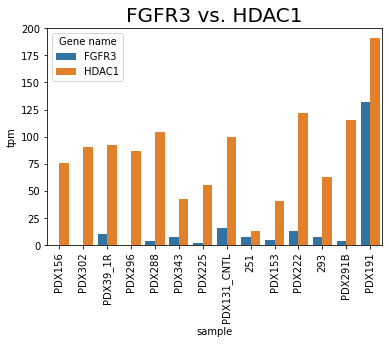

In [208]:
max_df = df[['sample','Gene name','tpm']].groupby(['sample','Gene name'],as_index=False).max()
tf = 'HDAC1'
data = max_df[(max_df['Gene name']==tf)|(max_df['Gene name']=='FGFR3')]
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,hue='Gene name')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR3 vs. '+tf,size=20)

Text(0, 0.5, 'HDAC1')

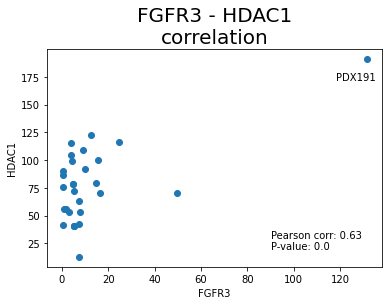

In [209]:
x = data['tpm'][data['Gene name']=='FGFR3']
y = data['tpm'][data['Gene name']==tf]
pearson, pvalue = stats.pearsonr(x,y)
pearson = round(pearson,3)
pvalue = round(pvalue,3)
pearson = 'Pearson corr: ' + str(pearson)
pvalue = 'P-value: '+ str(pvalue)
plt.scatter(x=x,y=y)
plt.title('FGFR3 - '+tf+'\ncorrelation',size=20)
x = data[['tpm']][(data['Gene name']=='FGFR3')&(data['sample']=='PDX191')].iloc[0][0]
y = data[['tpm']][(data['Gene name']==tf)&(data['sample']=='PDX191')].iloc[0][0]
plt.text(x=x*0.9,y=y*0.9,s='PDX191')
plt.text(x=90,y=30,s=pearson)
plt.text(x=90,y=20,s=pvalue)
plt.xlabel('FGFR3')
plt.ylabel(tf)


Text(0.5, 1.0, 'FGFR3 vs. SOX5')

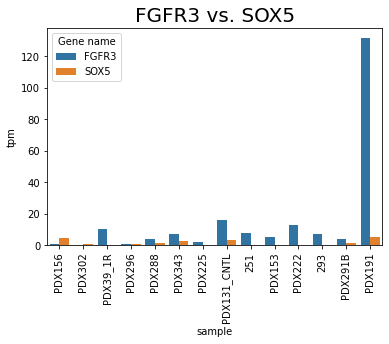

In [210]:
max_df = df[['sample','Gene name','tpm']].groupby(['sample','Gene name'],as_index=False).max()
tf = 'SOX5'
data = max_df[(max_df['Gene name']==tf)|(max_df['Gene name']=='FGFR3')]
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,hue='Gene name')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR3 vs. '+tf,size=20)

Text(0, 0.5, 'SOX5')

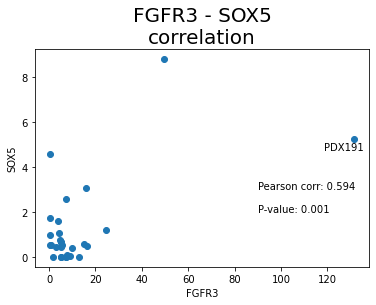

In [211]:
x = data['tpm'][data['Gene name']=='FGFR3']
y = data['tpm'][data['Gene name']==tf]
pearson, pvalue = stats.pearsonr(x,y)
pearson = round(pearson,3)
pvalue = round(pvalue,3)
pearson = 'Pearson corr: ' + str(pearson)
pvalue = 'P-value: '+ str(pvalue)
plt.scatter(x=x,y=y)
plt.title('FGFR3 - '+tf+'\ncorrelation',size=20)
x = data[['tpm']][(data['Gene name']=='FGFR3')&(data['sample']=='PDX191')].iloc[0][0]
y = data[['tpm']][(data['Gene name']==tf)&(data['sample']=='PDX191')].iloc[0][0]
plt.text(x=x*0.9,y=y*0.9,s='PDX191')
plt.text(x=90,y=3,s=pearson)
plt.text(x=90,y=2,s=pvalue)
plt.xlabel('FGFR3')
plt.ylabel(tf)


Text(0.5, 1.0, 'FGFR3 vs. SP1')

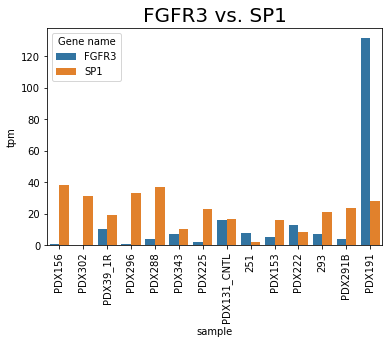

In [212]:
max_df = df[['sample','Gene name','tpm']].groupby(['sample','Gene name'],as_index=False).max()
tf = 'SP1'
data = max_df[(max_df['Gene name']==tf)|(max_df['Gene name']=='FGFR3')]
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,hue='Gene name')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR3 vs. SP1',size=20)

Text(0, 0.5, 'SP1')

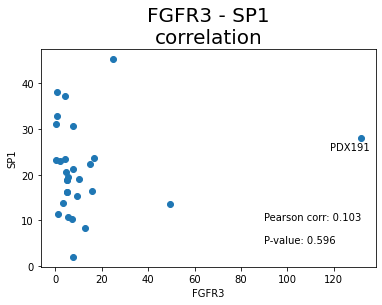

In [213]:
x = data['tpm'][data['Gene name']=='FGFR3']
y = data['tpm'][data['Gene name']=='SP1']
pearson, pvalue = stats.pearsonr(x,y)
pearson = round(pearson,3)
pvalue = round(pvalue,3)
pearson = 'Pearson corr: ' + str(pearson)
pvalue = 'P-value: '+ str(pvalue)
plt.scatter(x=x,y=y)
plt.title('FGFR3 - SP1\ncorrelation',size=20)
x = data[['tpm']][(data['Gene name']=='FGFR3')&(data['sample']=='PDX191')].iloc[0][0]
y = data[['tpm']][(data['Gene name']=='SP1')&(data['sample']=='PDX191')].iloc[0][0]
plt.text(x=x*0.9,y=y*0.9,s='PDX191')
plt.text(x=90,y=10,s=pearson)
plt.text(x=90,y=5,s=pvalue)
plt.xlabel('FGFR3')
plt.ylabel('SP1')


Text(0.5, 1.0, 'FGFR3 vs. SP3')

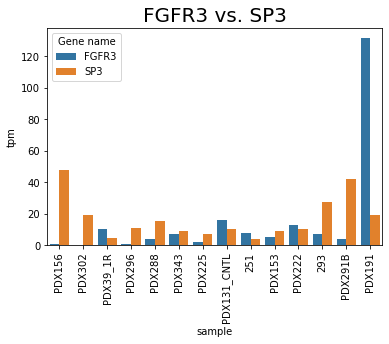

In [214]:
max_df = df[['sample','Gene name','tpm']].groupby(['sample','Gene name'],as_index=False).max()
tf = 'SP3'
data = max_df[(max_df['Gene name']==tf)|(max_df['Gene name']=='FGFR3')]
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,hue='Gene name')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR3 vs. '+tf,size=20)

Text(0, 0.5, 'SP3')

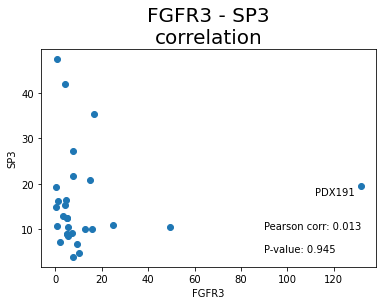

In [215]:
x = data['tpm'][data['Gene name']=='FGFR3']
y = data['tpm'][data['Gene name']==tf]
pearson, pvalue = stats.pearsonr(x,y)
pearson = round(pearson,3)
pvalue = round(pvalue,3)
pearson = 'Pearson corr: ' + str(pearson)
pvalue = 'P-value: '+ str(pvalue)
plt.scatter(x=x,y=y)
plt.title('FGFR3 - '+tf+'\ncorrelation',size=20)
x = data[['tpm']][(data['Gene name']=='FGFR3')&(data['sample']=='PDX191')].iloc[0][0]
y = data[['tpm']][(data['Gene name']==tf)&(data['sample']=='PDX191')].iloc[0][0]
plt.text(x=x*0.85,y=y*0.9,s='PDX191')
plt.text(x=90,y=10,s=pearson)
plt.text(x=90,y=5,s=pvalue)
plt.xlabel('FGFR3')
plt.ylabel(tf)


Text(0.5, 1.0, 'FGFR3 vs. SHOX')

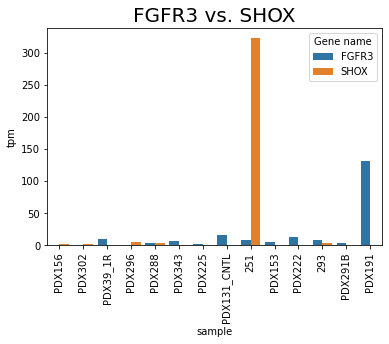

In [216]:
max_df = df[['sample','Gene name','tpm']].groupby(['sample','Gene name'],as_index=False).max()
tf = 'SHOX'
data = max_df[(max_df['Gene name']==tf)|(max_df['Gene name']=='FGFR3')]
x = data['sample']
y = data['tpm']
s = samples_by_resp
g = sns.barplot(x=x,y=y,data=data,order=s,hue='Gene name')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('FGFR3 vs. '+tf,size=20)

Text(0, 0.5, 'SHOX')

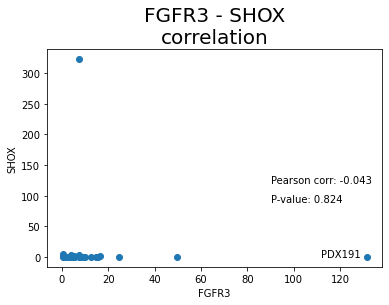

In [217]:
x = data['tpm'][data['Gene name']=='FGFR3']
y = data['tpm'][data['Gene name']==tf]
pearson, pvalue = stats.pearsonr(x,y)
pearson = round(pearson,3)
pvalue = round(pvalue,3)
pearson = 'Pearson corr: ' + str(pearson)
pvalue = 'P-value: '+ str(pvalue)
plt.scatter(x=x,y=y)
plt.title('FGFR3 - '+tf+'\ncorrelation',size=20)
x = data[['tpm']][(data['Gene name']=='FGFR3')&(data['sample']=='PDX191')].iloc[0][0]
y = data[['tpm']][(data['Gene name']==tf)&(data['sample']=='PDX191')].iloc[0][0]
plt.text(x=x*0.85,y=y*0.9,s='PDX191')
plt.text(x=90,y=120,s=pearson)
plt.text(x=90,y=90,s=pvalue)
plt.xlabel('FGFR3')
plt.ylabel(tf)
